# Alligators Don't Apologize - Exploratory Data Analysis

In [1]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

## Load the datasets

### 1) CMU Dataset

In [193]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
CMU_movie_metadata.head(10)

# Load the character metadata
CMU_char_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/character.metadata.tsv', sep='\t', header=None)
CMU_char_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_release_date', 'character_name', 'actor_DOB', 'actor_gender', 'actor_height_meters', 'actor_ethnicity', 'actor_name', 'actor_age_at_movie_release', 'freebase_character_actor_map_ID', 'freebase_character_ID', 'freebase_actor_ID']

# Load the plot summaries
CMU_plot_summary = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

#######

# Include the other parts of the dataset if needed

######

### 2) GVD Dataset

In [3]:
# Load the GVD dataset
GVD_data = pd.read_csv(raw_data_folder+'GVD_Dataset/2023_gvdDatabase_1_0_country.csv')

In [6]:
GVD_data.columns

Index(['year', 'country_code', 'country_name', 'country_region',
       'country_subregion', 'population', 'indicator', 'mechanism', 'count',
       'rate', 'count_population', 'source_name', 'source_url',
       'entry_comment'],
      dtype='object')

In [ ]:
GVD_usa =GVD_data[GVD_data.country_code == "USA"]
years = GVD_usa.year.unique()
nb_crime_year = dict()
for year in years: 
    GVD_usa_year = 
    nb_crime_year[year]= len(GVD_usa[GVD_usa.year ==year])

nb_crime_year

{np.int64(2004): 24,
 np.int64(2005): 24,
 np.int64(2006): 24,
 np.int64(2007): 24,
 np.int64(2008): 24,
 np.int64(2009): 24,
 np.int64(2010): 24,
 np.int64(2011): 24,
 np.int64(2012): 24,
 np.int64(2013): 24,
 np.int64(2014): 24,
 np.int64(2015): 24,
 np.int64(2016): 24,
 np.int64(2017): 24,
 np.int64(2018): 24,
 np.int64(2019): 24,
 np.int64(2020): 24,
 np.int64(2021): 24}

In [74]:
problematic_data = ['Data interpolated using a linear approximation in the 2023 update.',
       'Data estimated using a global multiplier in the 2023 update.',
       'Data estimated using a subregional average in the 2023 update.',
       'Data estimated in the 2023 update.']

GVD_usa[(GVD_usa.entry_comment != 'Data interpolated using a linear approximation in the 2023 update.') & (GVD_usa.population == "Total") & (GVD_usa.mechanism == "All")& (GVD_usa.indicator == "Killing during legal intervention")]



,year,country_code,country_name,country_region,country_subregion,population,indicator,mechanism,count,rate,count_population,source_name,source_url,entry_comment
94328,2010,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1276,0.41,309011469,International Media,NaN,Data collected and/or validated in the 2015 up...
94331,2011,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1350,0.43,311584051,International Media,NaN,Data collected and/or validated in the 2016 up...
94334,2012,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1649,0.53,314043885,International Media,NaN,Data collected and/or validated in the 2017 up...
94337,2013,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1629,0.51,316400539,International Media,NaN,Data collected and/or validated in the 2018 up...
94340,2014,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1486,0.47,318673422,International Media,NaN,Data collected and/or validated in the 2019 up...
94343,2015,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1356,0.42,320878312,International Media,NaN,Data collected and/or validated in the 2020 up...
94346,2016,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1356,0.42,323015992,International Media,NaN,Data collected and/or validated in the 2023 up...
94349,2017,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1767,0.54,325084758,National Media,https://www.washingtonpost.com/graphics/invest...,Data collected and/or validated in the 2023 up...
94352,2018,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1603,0.49,327096263,National Media,https://www.washingtonpost.com/graphics/invest...,Data collected and/or validated in the 2023 up...
94355,2019,USA,United States,Americas,Northern America,Total,Killing during legal intervention,All,1536,0.47,329064917,National Media,https://www.washingtonpost.com/graphics/invest...,Data collected and/or validated in the 2023 up...


In [76]:
GVD_usa[(GVD_usa.population == "Total") & (GVD_usa.year ==2004) & (GVD_usa.mechanism == "All")].indicator.unique()

array(['Homicide intentional', 'Homicide unintentional',
       'Killing during legal intervention', 'Violent death'], dtype=object)

In [78]:
GVD_data.indicator.unique()

array(['Homicide intentional', 'Homicide unintentional',
       'Killing during legal intervention', 'Violent death',
       'Conflict death'], dtype=object)

In [79]:
GVD_usa.indicator.unique()

array(['Homicide intentional', 'Homicide unintentional',
       'Killing during legal intervention', 'Violent death'], dtype=object)

In [82]:
GVD_data.columns 

Index(['year', 'country_code', 'country_name', 'country_region',
       'country_subregion', 'population', 'indicator', 'mechanism', 'count',
       'rate', 'count_population', 'source_name', 'source_url',
       'entry_comment'],
      dtype='object')

In [84]:
GVD_data.rate.unique()

array([ 0.  ,  4.25,  2.03, ..., 69.61, 87.7 , 18.09])

### 3) Kaggle Movies Dataset

In [195]:
# Load the movies metadata
Kaggle_movies_metadata = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/movies_metadata.csv')

# Load the credits
Kaggle_credits = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/credits.csv')

# Load the keywords data
Kaggle_keywords = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/keywords.csv')

# Load the ratings
Kaggle_ratings = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/ratings.csv')

# Load the links
Kaggle_links = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/links.csv')

/var/folders/8z/vm21_w1s46v5nvgv_mq9wlrh0000gn/T/ipykernel_98616/3945269963.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  Kaggle_movies_metadata = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/movies_metadata.csv')


### 4) Movies Body Count Dataset

In [196]:
# Load the movies body count data
movies_body_count = pd.read_csv(raw_data_folder+'Movies_Body_Count/movie_body_count.csv')

## Investigate the data

In [197]:
# Enable full display of the strings in the dataset -> enable if needed
#pd.set_option('display.max_colwidth', 20)

## 1) Investigate the CMU Dataset

### Identify the most violent movies (physical violence) based on the plot summaries:

In [198]:
violent_words_list = [
    "assassinate", "assassination", "assault", "attack", "behead", "beheading",
    "beat", "beating", "bludgeon", "blood", "bloody", "bomb", "bombing", "box",
    "boxing", "brutalize", "bullet", "butcher", "choke", "combat", "corpse", "crush",
    "decapitate", "decapitation", "dismember", "dismemberment", "enemy", "execute",
    "execution", "explode", "explosion", "fist fight", "gore", "gory", "gun", "gun down",
    "gunshot", "hack", "hang", "hit", "homicide", "impale", "injure", "injury",
    "kill", "killing", "knife", "knifing", "maim", "manslaughter", "massacre",
    "molest", "murder", "mutilate", "mutilation", "punch", "rape", "ravage", 
    "rip", "savage", "sever", "shoot", "shooting", "slash", "slay", "slaying",
    "slaughter", "slit", "smash", "stab", "stabbing", "strangle", "strangulation",
    "suffocate", "suffocation", "throttle", "torture", "trample", "wound",
    "artillery", "bombardment", "shelling", "ambush", "grenade", "mortar",
    "bayonet", "napalm", "landmine", "shrapnel"
]

In [199]:
# Add the movie titles and the genres
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name', 'movie_genres']], on='wikipedia_movie_ID', how='left')

# To avoid errors, we remove the NAN, so that we can then apply extract_genres to all CMU_movies_sprted_psycho
CMU_plot_summary['movie_genres'] = CMU_plot_summary['movie_genres'].fillna('')

def extract_genres(text):
    # Find all matches for genre names using a regex pattern that matches quoted text after colon
    return ', '.join(re.findall(r'": "([^"]+)"', text))

# Apply to the whole 'movie_genres' column
CMU_plot_summary['movie_genres'] = CMU_plot_summary['movie_genres'].apply(extract_genres)

# Lower case the plot_summaries
CMU_plot_summary['plot_summary'] = CMU_plot_summary['plot_summary'].str.lower()

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres
0,23890098,"shlykov, a hard-...",Taxi Blues,"Drama, World cinema"
1,31186339,the nation of pa...,The Hunger Games,Action/Adventure...
2,20663735,poovalli inducho...,Narasimham,"Musical, Action,..."
3,2231378,the lemon drop k...,The Lemon Drop Kid,Screwball comedy...
4,595909,seventh-day adve...,A Cry in the Dark,"Crime Fiction, D..."
...,...,...,...,...
42298,34808485,the story is abo...,Oomakkuyil Padumbol,Children's
42299,1096473,in 1928 hollywoo...,The Last Command,"Silent film, Ind..."
42300,35102018,american luthier...,Randy Parsons: A...,"Short Film, Musi..."
42301,8628195,abdur rehman kha...,Kabuliwala,Drama


In [200]:
# Make a deep copy of the plot_summary dataframe
CMU_scores = CMU_plot_summary.copy(deep=True)

In [201]:
# Define the pattern for the parsing
pattern = r'\b(?:' + '|'.join(violent_words_list) + r')\b'

# Count the number of words in each plot summary
CMU_scores['n_words_summary'] = CMU_scores['plot_summary'].str.split().str.len()

# Count the number of violent words from the violent_words_list in the plot_summary for each movie
CMU_scores['total_vio_words'] = CMU_scores['plot_summary'].str.count(pattern)

# Calculate the "violent words density" by dividing the violent words count by the number of words in the plot summary for each movie
CMU_scores['total_vio_words_density'] = CMU_scores['total_vio_words'] / CMU_scores['n_words_summary']

display(CMU_scores)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,n_words_summary,total_vio_words,total_vio_words_density
0,23890098,"shlykov, a hard-...",Taxi Blues,"Drama, World cinema",25,0,0.000000
1,31186339,the nation of pa...,The Hunger Games,Action/Adventure...,778,5,0.006427
2,20663735,poovalli inducho...,Narasimham,"Musical, Action,...",496,3,0.006048
3,2231378,the lemon drop k...,The Lemon Drop Kid,Screwball comedy...,849,0,0.000000
4,595909,seventh-day adve...,A Cry in the Dark,"Crime Fiction, D...",397,1,0.002519
...,...,...,...,...,...,...,...
42298,34808485,the story is abo...,Oomakkuyil Padumbol,Children's,40,0,0.000000
42299,1096473,in 1928 hollywoo...,The Last Command,"Silent film, Ind...",524,0,0.000000
42300,35102018,american luthier...,Randy Parsons: A...,"Short Film, Musi...",160,0,0.000000
42301,8628195,abdur rehman kha...,Kabuliwala,Drama,230,0,0.000000


In [202]:
# sort the movies according to their violent words density in the plot summary
CMU_scores = CMU_scores.sort_values(by='total_vio_words_density', ascending=False)
display(CMU_scores)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,n_words_summary,total_vio_words,total_vio_words_density
35435,19042389,two dance partne...,Accused,Mystery,18,2,0.111111
38529,30663765,the film is abou...,Manasina Maathu,Romance Film,9,1,0.111111
37873,113454,the film tells t...,Prizzi's Honor,"Romantic comedy,...",27,3,0.111111
37531,12073433,the film dramati...,The Beginning or...,"Romance Film, Dr...",19,2,0.105263
16735,23922445,a young couple e...,Assault! Jack th...,"Pinku eiga, Erot...",19,2,0.105263
...,...,...,...,...,...,...,...
25749,12071277,seemingly conten...,Beyza'nın Kadınları,"Crime Fiction, T...",86,0,0.000000
11229,12781333,"catania, women a...",Il bell'Antonio,"Drama, Black-and...",50,0,0.000000
25747,8138535,"corie , a free s...",Barefoot in the ...,"Romantic comedy,...",709,0,0.000000
11230,33188259,director kôji sh...,Shirome,Japanese Movies,304,0,0.000000


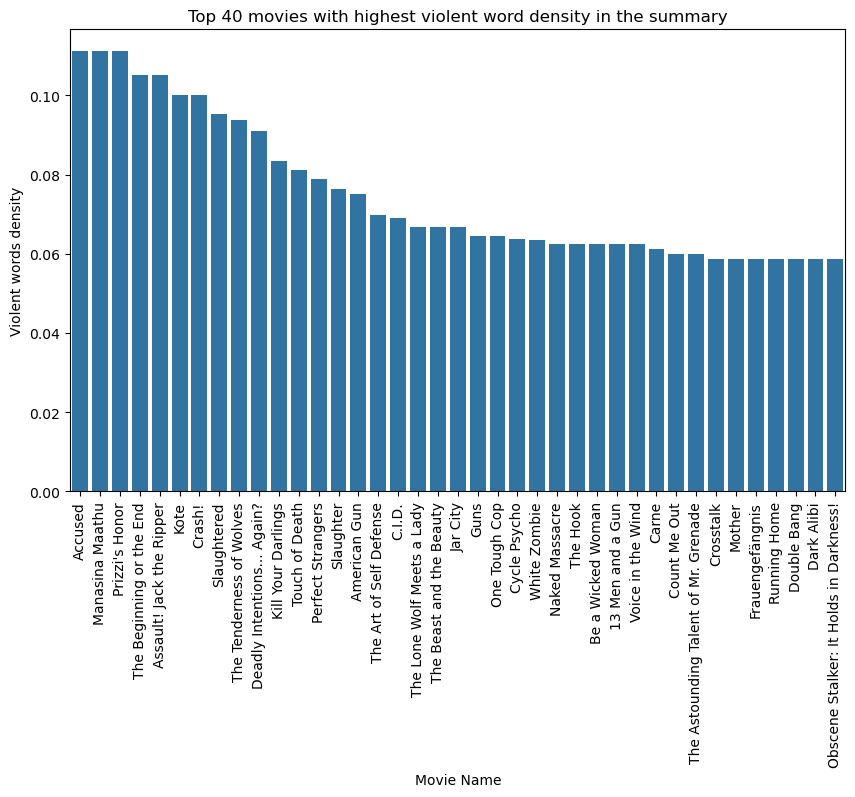

In [203]:
# Plot the results

top_movies = CMU_scores.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with highest violent word density in the summary")
plt.xticks(rotation=90)
plt.show()

### Investigate the most violent (psychological violence) movies

In [204]:
psycho_violence_list = [
    "abandon",
    "abandoned",
    "abandoning",
    "abandonment",
    "abuse",
    "abused",
    "abusing",
    "abusive",
    "agitate",
    "agitated",
    "agitating",
    "agony",
    "alienate",
    "alienated",
    "alienating",
    "amnesia",
    "anger",
    "angry",
    "anguish",
    "animalistic",
    "antagonise",
    "antagonize",
    "attack",
    "attacked",
    "attacking",
    "anxious",
    "avoid",
    "avoided",
    "avoiding",
    "backhanded",
    "belittle",
    "belittled",
    "belittling",
    "betray",
    "betrayal",
    "betrayed",
    "betraying",
    "blackmail",
    "blackmailed",
    "blackmailing",
    "blame",
    "blamed",
    "blame-shifting",
    "blaming",
    "brainwash",
    "brainwashed",
    "brainwashing",
    "break",
    "breaking",
    "broken",
    "bully",
    "bullied",
    "bullying",
    "catastrophise",
    "catastrophize",
    "catastrophising",
    "catastrophizing",
    "chaos",
    "condescending",
    "condescendent",
    "condition",
    "conditional",
    "control",
    "controlled",
    "controlling",
    "criticism",
    "criticise",
    "criticize",
    "criticised",
    "criticized",
    "criticising",
    "criticizing",
    "cruel",
    "cruelty",
    "damaging",
    "deceive",
    "deceit",
    "deceptive",
    "defame",
    "demean",
    "demeaned",
    "demeaning",
    "delude",
    "deluded",
    "deluding",
    "delusion",
    "delusional",
    "demoralize",
    "deny",
    "denial",
    "denied",
    "denying",
    "dependency",
    "depressed",
    "depression",
    "despair",
    "destructive",
    "discredit",
    "discredited",
    "discrediting",
    "dishonest",
    "dismiss",
    "dismissal",
    "dismissed",
    "dismissing",
    "dismissive",
    "disillusioned",
    "disorder",
    "disregard",
    "distress",
    "dominate",
    "dominated",
    "dominating",
    "domination",
    "downgrade",
    "downgraded", 
    "downgrading",
    "dread",
    "embarrass",
    "embarrassed",
    "embarrassing",
    "embarrassment",
    "entitle",
    "entitled",
    "entitlement",
    "exclude",
    "excluded",
    "excluding",
    "exclusion",
    "exploit",
    "exploited",
    "exploitation",
    "exploitative",
    "extortion",
    "fabricated",
    "fear",
    "fearing",
    "fearful",
    "fear-monger",
    "fear-mongered",
    "fear-mongering",
    "frighten",
    "frightened",
    "frightening",
    "gaslight",
    "gaslighted",
    "gaslighting",
    "gaslit",
    "guilt-trip",
    "guilt-tripped",
    "guilt-tripping",
    "guilty",
    "hallucinate",
    "hallucinated",
    "hallucinating",
    "hallucination",
    "harass",
    "harassed",
    "harassing",
    "harassment",
    "helplessness",
    "hoover",
    "hoovered",
    "hoovering",
    "hopelessness",
    "hostile",
    "hostility",
    "humiliate",
    "humiliated",
    "humiliating",
    "humiliation",
    "hurt",
    "hurting",
    "hypercriticise",
    "hypercriticize",
    "hypercriticised",
    "hypercriticized",
    "hypercriticising",
    "hypercriticizing",
    "ignore",
    "ignored",
    "ignoring",
    "illicit",
    "ill-treated",
    "ill-treatment",
    "illude",
    "illusion",
    "implode",
    "implosion",
    "inferior",
    "inferiority",
    "insane",
    "insanity",
    "insult",
    "insulted",
    "insulting",
    "intimidate",
    "intimidated",
    "intimidating",
    "intimidation",
    "invalidate",
    "invalidated",
    "invalidating",
    "invalidation",
    "isolate",
    "isolated",
    "isolating",
    "isolation",
    "jealous",
    "jealousy",
    "judgmental",
    "lie",
    "lied",
    "lying",
    "love-bomb",
    "love-bombed",
    "love-bombing",
    "mad",
    "madden",
    "maddened",
    "maddening",
    "madness",
    "manipulate",
    "manipulated",
    "manipulating",
    "manipulation",
    "manipulative",
    "mentally",
    "minimise",
    "minimize",
    "minimised",
    "minimized",
    "minimising",
    "minimizing",
    "mock",
    "mocked",
    "mockery",
    "mocking",
    "name-call",
    "name-called",
    "name-calling",
    "narcissism",
    "narcissist",
    "narcissistic",
    "neglect",
    "neglected",
    "neglecting",
    "normalise",
    "normalize",
    "normalised",
    "normalized",
    "normalising",
    "normalizing",
    "numb",
    "obsess", 
    "obsession",
    "obsessive",
    "oppressive",
    "oppression",
    "overprotect",
    "overprotected",
    "overprotecting",
    "overprotective",
    "outburst",
    "pain",
    "painfull",
    "paralised",
    "paralyzed",
    "paranoia",
    "passive-agressive",
    "patronise",
    "patronize",
    "patronised",
    "patronized",
    "patronising",
    "patronizing",
    "perverse",
    "possess",
    "possessed",
    "possessing",
    "possessive",
    "possessiveness",
    "power",
    "pretend",
    "project",
    "projected",
    "projecting",
    "projection",
    "psycho",
    "psychological",
    "psychopath",
    "psychology",
    "rage",
    "reject",
    "rejected",
    "rejecting",
    "rejection",
    "repress",
    "repressed",
    "repressing",
    "repression",
    "ridicule",
    "ridiculed",
    "ridiculing",
    "sabotage",
    "sabotaged",
    "sabotaging",
    "sad",
    "sadden",
    "saddened",
    "saddening",
    "sadness",
    "sarcasm",
    "scapegoat",
    "scapegoated",
    "scapegoating",
    "scared",
    "scaring",
    "scorn",
    "scorned",
    "scorning",
    "self-centered",
    "shame",
    "shamed",
    "shaming",
    "shatter",
    "shout",
    "shouted",
    "shouting",
    "sleep-deprived",
    "slander",
    "slandered",
    "slandering",
    "smear",
    "smeared",
    "smearing",
    "smother",
    "smothered",
    "smothering",
    "sneer",
    "sneered",
    "sneering",
    "stonewall",
    "stonewalled",
    "stonewalling",
    "stalk",
    "stalked",
    "stalking",
    "suicide",
    "suppress",
    "suppressed",
    "suppressing",
    "tactic",
    "threat",
    "threaten",
    "threatened",
    "threatening",
    "threats",
    "torment",
    "tormented",
    "tormenting",
    "trauma",
    "traumatise",
    "traumatize",
    "traumatised",
    "traumatized",
    "traumatising",
    "traumatizing",
    "triangulate",
    "triangulated",
    "triangulating",
    "two-faced",
    "ultimatum",
    "ultimatums",
    "unappreciated",
    "undermine",
    "undermined",
    "undermining",
    "undervalued",
    "undervaluation",
    "unhealthy",
    "unpredictable",
    "unstable",
    "untrustworthiness",
    "untrustworthy",
    "unworthy",
    "vengeful",
    "verbal abuse",
    "victim-blame",
    "victim-blamed",
    "victim-blaming",
    "vindictive",
    "vulnerable",
    "weaponise",
    "weaponize",
    "weaponised",
    "weaponized",
    "weaponising",
    "weaponizing",
    "withhold",
    "withheld",
    "withholding",
    "word salad",
    "yell",
    "yelled",
    "yelling"
]

#print(len(psycho_violence_list))

In [205]:
def find_all_occurences(type_violence_list, CMU_scores):
    # Reshape the list
    pattern_psycho = r'\b(?:' + '|'.join(type_violence_list) + r')\b'
    # Calculate the appearances
    CMU_scores['total_psycho_vio_words'] = CMU_scores['plot_summary'].str.findall(pattern_psycho).str.len()

find_all_occurences(psycho_violence_list, CMU_scores)

# Calculate the "violent words density" by dividing the violent words count by the number of words in the plot summary for each movie
CMU_scores['total_psycho_vio_words_density'] = CMU_scores['total_psycho_vio_words'] / CMU_scores['n_words_summary']

In [206]:
# Sort the movies according to their violent words
CMU_movies_sorted_psycho_words = CMU_scores.sort_values(by='total_psycho_vio_words', ascending=False)
display(CMU_movies_sorted_psycho_words)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,n_words_summary,total_vio_words,total_vio_words_density,total_psycho_vio_words,total_psycho_vio_words_density
15583,30201005,the film opens w...,J. Edgar,"LGBT, Biographic...",963,3,0.003115,46,0.047767
17302,10619079,episode 1: a new...,Genocyber,Animation,3793,18,0.004746,44,0.011600
3060,21768047,{{plot}} fuyuki ...,Keroro Gunso the...,Japanese Movies,3144,19,0.006043,33,0.010496
34837,14573581,"{{plot|date""barb...",Yogi Bear and th...,"Family Film, Ani...",2172,3,0.001381,31,0.014273
2557,11103867,the story begin...,Dragon Head,"Science Fiction,...",3382,23,0.006801,31,0.009166
...,...,...,...,...,...,...,...,...,...
40522,31347856,a group of young...,Alkitrang dugo,"Thriller, Myster...",127,0,0.000000,0,0.000000
40523,27737919,monica plays cam...,Love Song,"Romance Film, Drama",71,0,0.000000,0,0.000000
40524,10536621,the film has no ...,Place des Cordel...,"Short Film, Sile...",40,0,0.000000,0,0.000000
40517,24316575,"ippei, a college...",Invisible Man: R...,"Japanese Movies,...",37,0,0.000000,0,0.000000


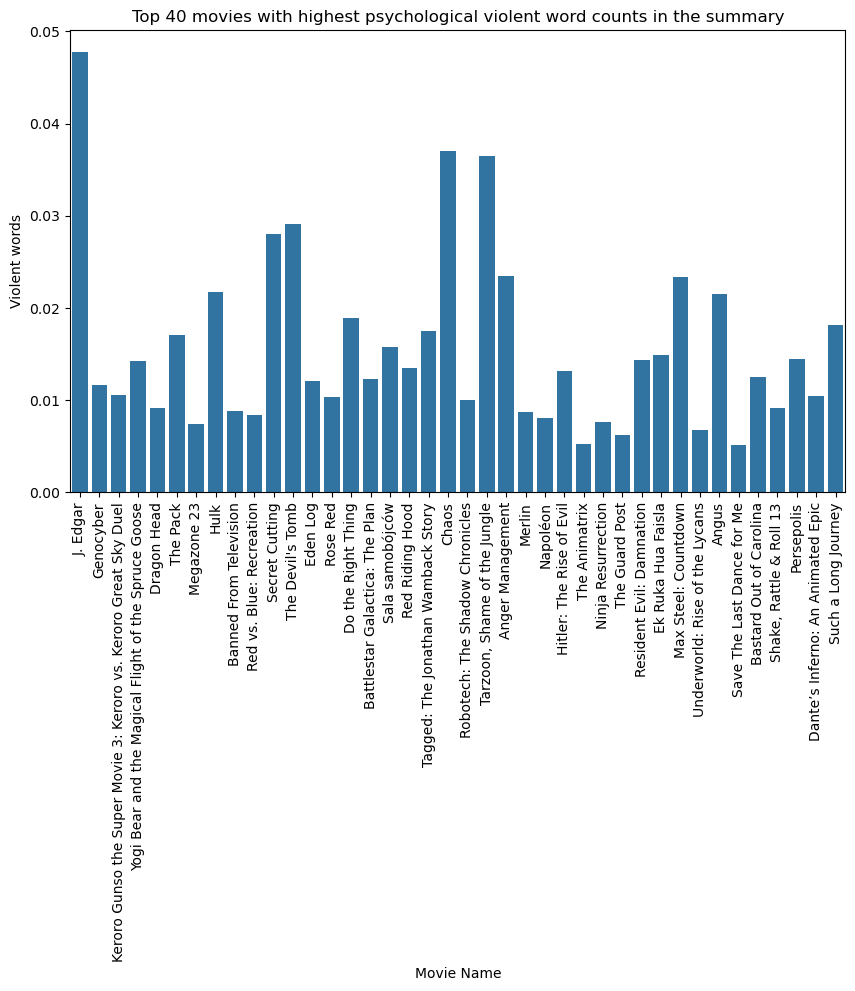

In [207]:
# Plot the results

top_movies_by_words = CMU_movies_sorted_psycho_words.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_by_words['movie_name'], y=top_movies_by_words['total_psycho_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words")
plt.title("Top 40 movies with highest psychological violent word counts in the summary")
plt.xticks(rotation=90)
plt.show()

In [208]:
# Sort the movies according to their violent words density in the plot summary
CMU_movies_sorted_psycho_density = CMU_scores.sort_values(by='total_psycho_vio_words_density', ascending=False)
display(CMU_movies_sorted_psycho_density)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,n_words_summary,total_vio_words,total_vio_words_density,total_psycho_vio_words,total_psycho_vio_words_density
10427,9612611,mysterious pilot...,The Shadow of th...,"Crime Fiction, A...",16,0,0.000000,2,0.125000
28359,28807164,the daughters of...,Deadly Advice,"Drama, Comedy",17,0,0.000000,2,0.117647
19549,34596327,a journalist who...,The Beast to Die,"Crime Fiction, A...",19,1,0.052632,2,0.105263
36592,19286405,panakkara kudumb...,Panakkara Kudumbam,Drama,19,0,0.000000,2,0.105263
15190,26477451,a look at the li...,You Don't Know Jack,"Courtroom Drama,...",39,0,0.000000,4,0.102564
...,...,...,...,...,...,...,...,...,...
40522,31347856,a group of young...,Alkitrang dugo,"Thriller, Myster...",127,0,0.000000,0,0.000000
40523,27737919,monica plays cam...,Love Song,"Romance Film, Drama",71,0,0.000000,0,0.000000
40524,10536621,the film has no ...,Place des Cordel...,"Short Film, Sile...",40,0,0.000000,0,0.000000
40517,24316575,"ippei, a college...",Invisible Man: R...,"Japanese Movies,...",37,0,0.000000,0,0.000000


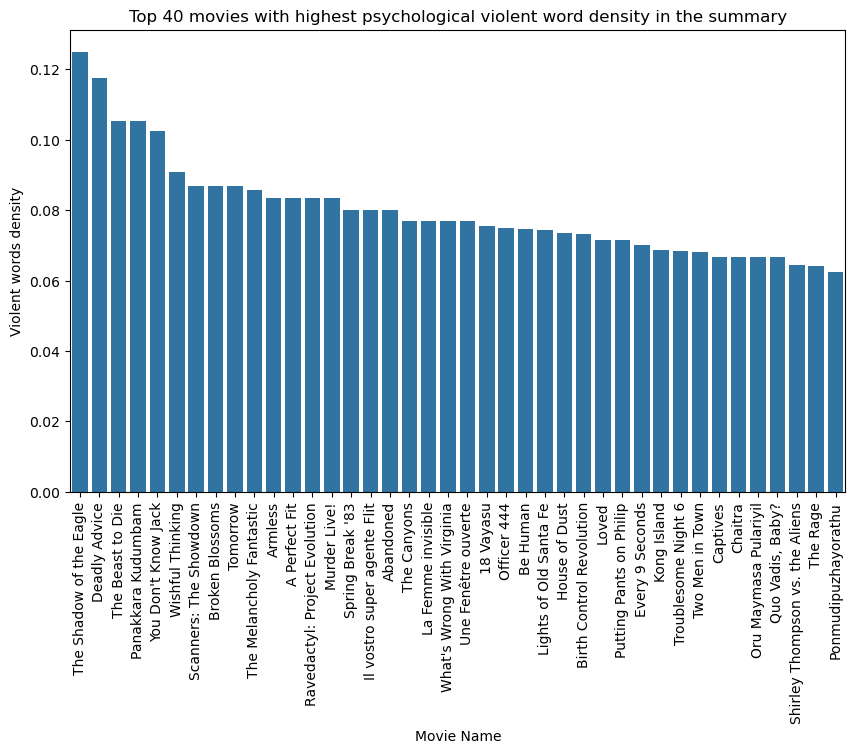

In [209]:
top_movies_density = CMU_movies_sorted_psycho_density.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_density['movie_name'], y=top_movies_density['total_psycho_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with highest psychological violent word density in the summary")
plt.xticks(rotation=90)
plt.show()

In [210]:
top_movies_density['movie_genres'].value_counts()

movie_genres
Drama                                                                                       3
Short Film                                                                                  3
Crime Fiction, Adventure, Detective, Black-and-white, Action/Adventure, Western, Action     1
Silent film, Indie, Black-and-white, Short Film, Comedy, Slapstick                          1
Silent film, Action, Black-and-white                                                        1
Short Film, Family Film, Comedy, Animation                                                  1
Action/Adventure, Western, Action, Musical                                                  1
Thriller, Supernatural                                                                      1
Japanese Movies, Pinku eiga                                                                 1
Drama, Courtroom Drama                                                                      1
Horror, Chinese Movies                         

In [211]:
display(CMU_scores)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,n_words_summary,total_vio_words,total_vio_words_density,total_psycho_vio_words,total_psycho_vio_words_density
35435,19042389,two dance partne...,Accused,Mystery,18,2,0.111111,0,0.000000
38529,30663765,the film is abou...,Manasina Maathu,Romance Film,9,1,0.111111,0,0.000000
37873,113454,the film tells t...,Prizzi's Honor,"Romantic comedy,...",27,3,0.111111,0,0.000000
37531,12073433,the film dramati...,The Beginning or...,"Romance Film, Dr...",19,2,0.105263,1,0.052632
16735,23922445,a young couple e...,Assault! Jack th...,"Pinku eiga, Erot...",19,2,0.105263,0,0.000000
...,...,...,...,...,...,...,...,...,...
25749,12071277,seemingly conten...,Beyza'nın Kadınları,"Crime Fiction, T...",86,0,0.000000,0,0.000000
11229,12781333,"catania, women a...",Il bell'Antonio,"Drama, Black-and...",50,0,0.000000,0,0.000000
25747,8138535,"corie , a free s...",Barefoot in the ...,"Romantic comedy,...",709,0,0.000000,6,0.008463
11230,33188259,director kôji sh...,Shirome,Japanese Movies,304,0,0.000000,4,0.013158
